In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PowerTransformer
# from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from scipy import stats
import pyhere


In [150]:
dir_data_raw = pyhere.here().resolve().joinpath("data", "raw")
dir_data_interim = pyhere.here().resolve().joinpath("data", "interim")
dir_data_external = pyhere.here().resolve().joinpath("data", "external")

In [151]:
csv_power_plants = pd.read_csv(dir_data_interim/"power_plants_with_generation_transformed.csv", index_col=[0])

In [152]:
df_transformed = pd.read_csv(dir_data_external/"v2_transformed_data_combined_with_nasa.csv", index_col=['index'])
df_transformed

,latitude,longitude,ANN_ALLSKY_KT_2012,ANN_ALLSKY_KT_2013,ANN_ALLSKY_KT_2014,ANN_ALLSKY_KT_2015,ANN_ALLSKY_KT_2016,ANN_ALLSKY_KT_2017,ANN_ALLSKY_KT_2018,ANN_ALLSKY_KT_2019,...,winter_WS50M_MAX_AVG_2018,winter_WS50M_MAX_AVG_2019,winter_WS50M_MIN_AVG_2012,winter_WS50M_MIN_AVG_2013,winter_WS50M_MIN_AVG_2014,winter_WS50M_MIN_AVG_2015,winter_WS50M_MIN_AVG_2016,winter_WS50M_MIN_AVG_2017,winter_WS50M_MIN_AVG_2018,winter_WS50M_MIN_AVG_2019
index,,,,,,,,,,,,,,,,,,,,,
0,32.3220,65.1190,0.69,0.70,0.70,0.68,0.71,0.71,0.70,0.69,...,6.966667,6.850000,1.283333,1.003333,1.023333,1.006667,0.950000,1.320000,1.176667,1.176667
1,31.6700,65.7950,0.70,0.70,0.70,0.69,0.72,0.71,0.70,0.69,...,7.606667,7.903333,1.663333,1.473333,1.290000,1.520000,1.543333,1.613333,1.476667,1.603333
2,31.6230,65.7920,0.70,0.70,0.70,0.69,0.72,0.71,0.70,0.69,...,7.606667,7.903333,1.663333,1.473333,1.290000,1.520000,1.543333,1.613333,1.476667,1.603333
3,34.5560,69.4787,0.65,0.65,0.65,0.63,0.66,0.67,0.67,0.65,...,5.126667,5.426667,1.870000,1.380000,1.606667,1.260000,1.473333,1.873333,1.210000,1.516667
4,34.6410,69.7170,0.65,0.65,0.65,0.63,0.66,0.67,0.67,0.65,...,4.650000,4.740000,1.616667,1.020000,1.063333,0.743333,0.936667,1.336667,0.916667,0.923333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,-12.9667,28.6333,0.59,0.60,0.59,0.59,0.60,0.57,0.59,0.59,...,6.050000,5.556667,2.056667,2.323333,2.373333,2.510000,1.760000,2.160000,2.183333,1.750000
34932,-12.8167,28.2000,0.59,0.60,0.59,0.59,0.60,0.57,0.59,0.59,...,6.076667,5.696667,2.090000,2.503333,2.360000,2.596667,1.806667,2.246667,2.200000,1.790000
34933,-17.9167,25.8500,0.62,0.62,0.61,0.64,0.62,0.59,0.62,0.65,...,6.873333,7.233333,2.180000,2.910000,2.400000,3.120000,2.076667,2.496667,2.300000,2.903333


In [153]:
df_transformed.columns

Index(['latitude', 'longitude', 'ANN_ALLSKY_KT_2012', 'ANN_ALLSKY_KT_2013',
       'ANN_ALLSKY_KT_2014', 'ANN_ALLSKY_KT_2015', 'ANN_ALLSKY_KT_2016',
       'ANN_ALLSKY_KT_2017', 'ANN_ALLSKY_KT_2018', 'ANN_ALLSKY_KT_2019',
       ...
       'winter_WS50M_MAX_AVG_2018', 'winter_WS50M_MAX_AVG_2019',
       'winter_WS50M_MIN_AVG_2012', 'winter_WS50M_MIN_AVG_2013',
       'winter_WS50M_MIN_AVG_2014', 'winter_WS50M_MIN_AVG_2015',
       'winter_WS50M_MIN_AVG_2016', 'winter_WS50M_MIN_AVG_2017',
       'winter_WS50M_MIN_AVG_2018', 'winter_WS50M_MIN_AVG_2019'],
      dtype='object', length=282)

In [154]:
# csv_power_plants.loc[0:34935, ['capacity_mw', 'primary_fuel_transformed']].index.name = "index"
csv_power_plants.index.rename('index', inplace=True)
csv_power_plants


,capacity_mw,latitude,longitude,primary_fuel_transformed
index,,,,
0,33.0,32.3220,65.1190,Other
1,10.0,31.6700,65.7950,Solar
2,10.0,31.6230,65.7920,Solar
3,66.0,34.5560,69.4787,Other
4,100.0,34.6410,69.7170,Other
...,...,...,...,...
34931,50.0,-12.9667,28.6333,Other
34932,20.0,-12.8167,28.2000,Other
34933,108.0,-17.9167,25.8500,Other


In [155]:
# df_transformed_combined = df_transformed.merge(csv_power_plants.loc[0:24360, ['capacity_mw', 'primary_fuel_transformed']],left_on="index", right_on="index")
df_transformed_combined = df_transformed.merge(csv_power_plants[['capacity_mw', 'primary_fuel_transformed']],left_on="index", right_on="index")

In [156]:
df_transformed_combined

,latitude,longitude,ANN_ALLSKY_KT_2012,ANN_ALLSKY_KT_2013,ANN_ALLSKY_KT_2014,ANN_ALLSKY_KT_2015,ANN_ALLSKY_KT_2016,ANN_ALLSKY_KT_2017,ANN_ALLSKY_KT_2018,ANN_ALLSKY_KT_2019,...,winter_WS50M_MIN_AVG_2012,winter_WS50M_MIN_AVG_2013,winter_WS50M_MIN_AVG_2014,winter_WS50M_MIN_AVG_2015,winter_WS50M_MIN_AVG_2016,winter_WS50M_MIN_AVG_2017,winter_WS50M_MIN_AVG_2018,winter_WS50M_MIN_AVG_2019,capacity_mw,primary_fuel_transformed
index,,,,,,,,,,,,,,,,,,,,,
0,32.3220,65.1190,0.69,0.70,0.70,0.68,0.71,0.71,0.70,0.69,...,1.283333,1.003333,1.023333,1.006667,0.950000,1.320000,1.176667,1.176667,33.0,Other
1,31.6700,65.7950,0.70,0.70,0.70,0.69,0.72,0.71,0.70,0.69,...,1.663333,1.473333,1.290000,1.520000,1.543333,1.613333,1.476667,1.603333,10.0,Solar
2,31.6230,65.7920,0.70,0.70,0.70,0.69,0.72,0.71,0.70,0.69,...,1.663333,1.473333,1.290000,1.520000,1.543333,1.613333,1.476667,1.603333,10.0,Solar
3,34.5560,69.4787,0.65,0.65,0.65,0.63,0.66,0.67,0.67,0.65,...,1.870000,1.380000,1.606667,1.260000,1.473333,1.873333,1.210000,1.516667,66.0,Other
4,34.6410,69.7170,0.65,0.65,0.65,0.63,0.66,0.67,0.67,0.65,...,1.616667,1.020000,1.063333,0.743333,0.936667,1.336667,0.916667,0.923333,100.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,-12.9667,28.6333,0.59,0.60,0.59,0.59,0.60,0.57,0.59,0.59,...,2.056667,2.323333,2.373333,2.510000,1.760000,2.160000,2.183333,1.750000,50.0,Other
34932,-12.8167,28.2000,0.59,0.60,0.59,0.59,0.60,0.57,0.59,0.59,...,2.090000,2.503333,2.360000,2.596667,1.806667,2.246667,2.200000,1.790000,20.0,Other
34933,-17.9167,25.8500,0.62,0.62,0.61,0.64,0.62,0.59,0.62,0.65,...,2.180000,2.910000,2.400000,3.120000,2.076667,2.496667,2.300000,2.903333,108.0,Other


primary_fuel_transformed
Other                       18917
Solar                       10665
Wind                         5344
dtype: int64


<AxesSubplot:xlabel='primary_fuel_transformed'>

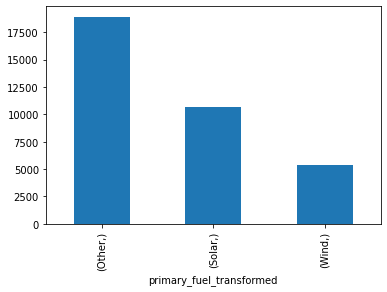

In [157]:
print(df_transformed_combined[['primary_fuel_transformed']].value_counts())
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [158]:
label_encoder = LabelEncoder()
# df_transformed_combined.isna().sum()
# df_transformed_combined[df_transformed_combined.isna().any(axis=1)]
df_transformed_combined.dropna(inplace = True)
df_transformed_combined['code_prim_fuel_transf'] = label_encoder.fit_transform(df_transformed_combined['primary_fuel_transformed'])


In [159]:
df_target_equivalent = df_transformed_combined[['primary_fuel_transformed', 'code_prim_fuel_transf']].drop_duplicates()
df_target_equivalent

,primary_fuel_transformed,code_prim_fuel_transf
index,,
0,Other,0
1,Solar,1
91,Wind,2


## Balancing the data

In [160]:
index_rows_to_delete = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 0].sample(14000).index
# index_rows_to_delete = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 0].sample(9000).index
index_rows_to_delete_solar = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 1].sample(5500).index
# index_rows_to_delete_solar = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 1].sample(3000).index


In [161]:
df_transformed_combined.drop(index_rows_to_delete, axis = 0, inplace = True)
df_transformed_combined.drop(index_rows_to_delete_solar, axis = 0, inplace = True)

<AxesSubplot:xlabel='primary_fuel_transformed'>

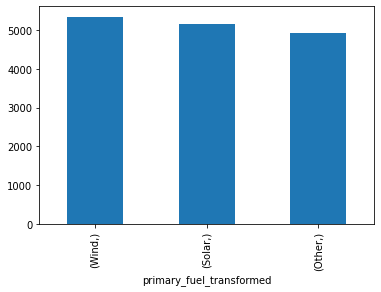

In [162]:
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [163]:
# df_transformed_combined.isna().sum()
# df_transformed_combined[df_transformed_combined.isna().any(axis=1)]
# df_transformed_combined.dropna(inplace = True)

pre_X = df_transformed_combined.drop(columns=['capacity_mw', 'latitude', 'longitude', 'primary_fuel_transformed'])
X = pre_X.drop(columns=['code_prim_fuel_transf'])
y = pre_X['code_prim_fuel_transf']

In [164]:
y

index
1        1
2        1
5        0
9        0
14       0
        ..
34923    0
34924    0
34925    0
34931    0
34933    0
Name: code_prim_fuel_transf, Length: 15426, dtype: int64

In [165]:
# sns.kdeplot(data=pre_X, x='winter_TQV_2009', hue='code_prim_fuel_transf', shade=True)

In [166]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [167]:
def get_accuracy(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds_val)

    return accuracy

In [168]:
def get_accuracy_knn(n_neighbors, X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds_val)

    return accuracy

In [19]:
mi_scores = make_mi_scores(X, y)
mi_scores[::3]

autumn_ALLSKY_SFC_SW_DWN_2013    0.316014
spring_ALLSKY_SFC_SW_DWN_2017    0.303913
autumn_ALLSKY_SFC_SW_DWN_2016    0.300964
autumn_ALLSKY_SFC_SW_DWN_2018    0.296522
autumn_CLRSKY_SFC_SW_DWN_2013    0.294349
                                   ...   
ANN_ALLSKY_KT_2016               0.059400
ANN_ALLSKY_KT_2015               0.057562
ANN_ALLSKY_KT_2013               0.048390
ANN_ALLSKY_KT_2019               0.043224
ANN_CLRSKY_SFC_SW_DWN_2019       0.000000
Name: MI Scores, Length: 94, dtype: float64

In [20]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

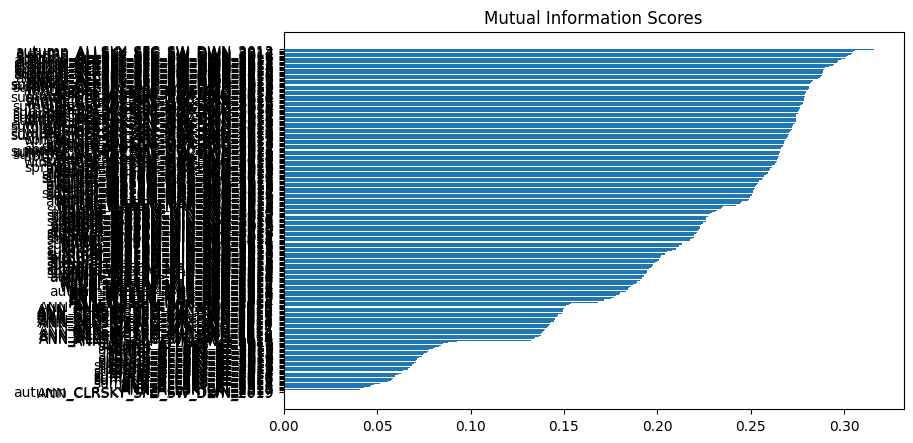

In [21]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [169]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

## DECISION TREE CLASSIFIER

1200


<AxesSubplot:>

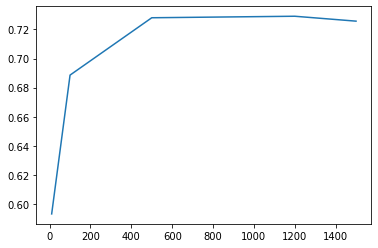

In [170]:
candidate_max_leaf_nodes = [10, 100, 500, 1200, 1500]
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


results = {node: get_accuracy(node, train_X, val_X, train_y, val_y) for node in candidate_max_leaf_nodes}
# for node in candidate_max_leaf_nodes:
#     results[node] = get_accuracy(node, X_train, X_test, y_train, y_test)
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = max(results, key=results.get)
print(best_tree_size)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [171]:
tree_model = DecisionTreeClassifier(max_leaf_nodes = best_tree_size, random_state=0)
tree_model.fit(train_X, train_y)
y_pred = tree_model.predict(val_X)
# print(cross_val_score(tree_model, X, y, cv=5))

<AxesSubplot:>

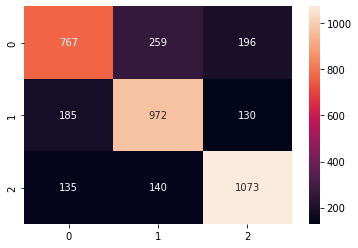

In [172]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [173]:
accuracy_score(val_y, y_pred)

0.729064039408867

In [174]:
precision_score(val_y, y_pred, average='weighted')

0.7281794612899337

In [28]:
tree_model.score(val_X, val_y)

0.7540082455336693

In [29]:
# tree.plot_tree(tree_model)

# RANDOM FOREST CLASSIFIER

In [175]:
# Numbers of trees
n_estimators = [int(x) for x in np.arange(10, 101, 10)]
# Numbers of features to consider at every split
max_features = [1, "sqrt", "log2"]
# Maximum numbers of levels in tree
max_depth = [50, 100, 500]
# Minimum numbers of samples required to split a node
min_samples_split = [2, 10, 50, 100, 500]
# Minimum numbers of samples required at each leaf node
min_samples_leaf = [100, 500, 1000, 1500]
# Method of selecting samples for training each tree
bootstrap = [True, False]

max_leaf_nodes = [1000, 1500, 1700]

param_grid = {
                'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap,
                'max_leaf_nodes': max_leaf_nodes
            }



In [176]:
rf_model = RandomForestClassifier(random_state=0)
# rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=3, verbose = 2, n_jobs=4)
rf_grid = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, n_iter = 20, cv=5, verbose = 2, n_jobs=4)

In [177]:
rf_grid.fit(train_X, train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=100, max_features=1, max_leaf_nodes=1500, min_samples_leaf=1000, min_samples_split=100, n_estimators=20; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=1, max_leaf_nodes=1500, min_samples_leaf=1000, min_samples_split=100, n_estimators=20; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=1, max_leaf_nodes=1500, min_samples_leaf=1000, min_samples_split=100, n_estimators=20; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=1, max_leaf_nodes=1500, min_samples_leaf=1000, min_samples_split=100, n_estimators=20; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=1, max_leaf_nodes=1500, min_samples_leaf=1000, min_samples_split=100, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=500, max_features=sqrt, max_leaf_nodes=1500, min_samples_leaf=100, min_samples_split=50, n_estimators=10; t

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=20, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 100, 500],
                                        'max_features': [1, 'sqrt', 'log2'],
                                        'max_leaf_nodes': [1000, 1500, 1700],
                                        'min_samples_leaf': [100, 500, 1000,
                                                             1500],
                                        'min_samples_split': [2, 10, 50, 100,
                                                              500],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   verbose=2)

In [178]:
rf_grid.best_params_

{'n_estimators': 60,
 'min_samples_split': 50,
 'min_samples_leaf': 100,
 'max_leaf_nodes': 1500,
 'max_features': 'sqrt',
 'max_depth': 500,
 'bootstrap': False}

In [179]:
rf_grid.score(val_X, val_y)

0.698211044853513

In [86]:
rf_model2 = RandomForestClassifier(bootstrap= False,
 max_depth= 50,
 max_features= 'log2',
 min_samples_leaf= 100,
 min_samples_split= 100,
 n_estimators= 20,
 max_leaf_nodes= 1700,
 random_state=0)
rf_model2.fit(train_X, train_y)
y_pred = rf_model2.predict(val_X)
# print(cross_val_score(tree_model, X, y, cv=5))

<AxesSubplot:>

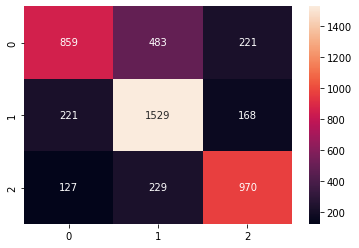

In [87]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [32]:
accuracy_score(val_y, y_pred)

0.7240036646816308

In [57]:
rf_model2.score(val_X, val_y)

0.7001295336787565

1    1918
0    1563
2    1326
Name: code_prim_fuel_transf, dtype: int64


<AxesSubplot:>

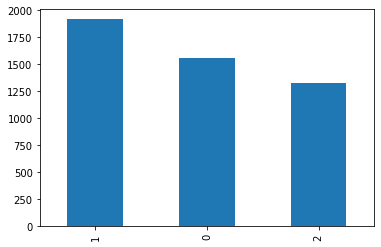

In [88]:
print(val_y.value_counts())
val_y.value_counts().plot.bar()

# XGBOOST

In [89]:
xgbclass_model_1 = XGBClassifier(random_state=0)
xgbclass_model_1.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [90]:
y_pred = xgbclass_model_1.predict(val_X)

In [91]:
xgbclass_model_1.score(val_X, val_y)

0.7657582691907635

<AxesSubplot:>

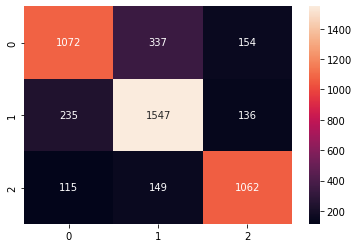

In [92]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [180]:
xgbclass_model_2 = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4, early_stopping_rounds=5)
xgbclass_model_2.fit(train_X, train_y, 
             eval_set=[(val_X, val_y)], 
             verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=5, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=4, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [181]:
y_pred = xgbclass_model_2.predict(val_X)

In [182]:
xgbclass_model_2.score(val_X, val_y)

0.7619911848586984

<AxesSubplot:>

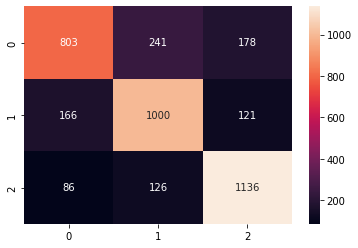

In [183]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# KNN

5


<AxesSubplot:>

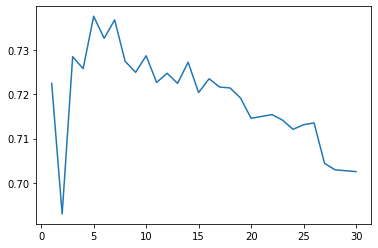

In [99]:
candidate_n_neighbors = np.arange(1,31)
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


results = {n: get_accuracy_knn(n, train_X, val_X, train_y, val_y) for n in candidate_n_neighbors}
best_n_neighbors = max(results, key=results.get)
print(best_n_neighbors)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [100]:
knn_model_1 = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn_model_1.fit(train_X, train_y)

KNeighborsClassifier()

In [101]:
knn_model_1.score(val_X, val_y)

0.7376742250884127

In [184]:
# train_X_normalized = stats.boxcox(train_X)
x = train_X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
power_transformer = PowerTransformer(method='yeo-johnson')
# x_scaled = min_max_scaler.fit_transform(x)
x_scaled = power_transformer.fit_transform(x)
train_X_scaled = pd.DataFrame(x_scaled, index=train_X.index, columns=train_X.columns)

x = val_X.values #returns a numpy array
# x_scaled = min_max_scaler.fit_transform(x)
x_scaled = power_transformer.fit_transform(x)
val_X_scaled = pd.DataFrame(x_scaled, index=val_X.index, columns=val_X.columns)


In [185]:
train_X_scaled

,ANN_ALLSKY_KT_2012,ANN_ALLSKY_KT_2013,ANN_ALLSKY_KT_2014,ANN_ALLSKY_KT_2015,ANN_ALLSKY_KT_2016,ANN_ALLSKY_KT_2017,ANN_ALLSKY_KT_2018,ANN_ALLSKY_KT_2019,ANN_ALLSKY_SFC_SW_DWN_2012,ANN_ALLSKY_SFC_SW_DWN_2013,...,winter_WS50M_MAX_AVG_2018,winter_WS50M_MAX_AVG_2019,winter_WS50M_MIN_AVG_2012,winter_WS50M_MIN_AVG_2013,winter_WS50M_MIN_AVG_2014,winter_WS50M_MIN_AVG_2015,winter_WS50M_MIN_AVG_2016,winter_WS50M_MIN_AVG_2017,winter_WS50M_MIN_AVG_2018,winter_WS50M_MIN_AVG_2019
index,,,,,,,,,,,,,,,,,,,,,
9681,-0.659694,-1.058854,-1.085571,-1.028013,-1.130704,-0.678359,-0.794052,-0.774989,-0.887909,-1.130665,...,-0.209215,0.334817,0.838885,0.125200,-0.250262,0.276219,0.084171,0.373515,0.161252,0.587314
13513,-0.659694,-1.058854,-1.085571,-0.724887,-0.981144,-0.678359,-0.616885,-0.774989,-0.908741,-1.130665,...,0.328719,0.709388,0.844585,0.249720,-0.311061,0.234169,0.050649,0.400446,0.247695,0.669521
6732,-1.851343,-1.233037,-1.888750,-2.286254,-1.747239,-1.718036,-1.756774,-1.584039,-0.763218,-0.270505,...,-0.325403,-0.516699,0.054040,-0.293824,-0.129162,-0.441701,-0.189501,-0.474297,-0.218277,-0.207324
28832,0.245426,-0.263962,-0.341097,-0.278258,-0.119655,-0.257554,-0.444447,-0.465851,0.116630,-0.154386,...,-0.303643,-0.205891,-0.434844,-0.131026,-0.239323,-0.234487,-0.527411,-0.393634,0.085453,-0.199720
8303,-1.851343,-1.412750,-2.057027,-2.124796,-2.066983,-1.718036,-1.965988,-1.752395,-0.783965,-0.398542,...,-0.325403,-0.516699,0.054040,-0.293824,-0.129162,-0.441701,-0.189501,-0.474297,-0.218277,-0.207324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29443,0.373260,0.021862,0.079956,-0.131473,0.289384,0.149510,-0.113140,-0.016672,0.488470,0.166753,...,-0.902807,-1.003166,-0.222417,-0.652623,-0.473818,-0.425169,-0.697811,-0.700445,-0.479953,-0.561662
7630,0.627861,0.785194,0.483228,0.445583,0.684957,0.543536,0.782356,0.415942,0.458458,0.539089,...,0.633472,-0.000323,-0.237718,0.081256,0.100988,-0.064824,-0.181856,-0.205827,-0.019354,-0.294464
22312,-1.317689,-1.058854,-0.932186,-1.028013,-1.130704,-1.262123,-1.163232,-1.092238,-1.381406,-1.281026,...,0.325037,0.568447,1.004449,0.612829,0.727064,0.844572,0.952023,0.864437,0.689454,0.927799


In [186]:
def axis_calculation(total_columns_df, grid_columns):
    rows = int(total_columns_df / grid_columns)
    if( total_columns_df % grid_columns) > 0:
        rows += 1

    return (rows, grid_columns)
print(axis_calculation(30, 4))

(8, 4)


In [187]:

# # plt.figure(figsize=(200,200))
# grid_columns = 5
# result_axis = axis_calculation(len(train_X_scaled.columns), grid_columns)
# fig, axs = plt.subplots(result_axis[0],result_axis[1], figsize=(30,20))
# fig.subplots_adjust(hspace=.5)

# aux_cont = 0
# aux_cont_2 = 0
# # fig.figsize=(30,30)
# for col in train_X_scaled.columns:
# # #     # print(col)
#     sns.kdeplot(data=train_X_scaled, x=col, shade=True, ax=axs[aux_cont_2, aux_cont] )
#     # axs[aux_cont_2, aux_cont].set_xlabel('Participation Rate')
#     # axs[aux_cont_2, aux_cont].set_ylabel('Frequency')
#     # axs[aux_cont_2, aux_cont].set_title("sasa")
#     axs[aux_cont_2, aux_cont].set_xticklabels([])
#     aux_cont += 1
#     if aux_cont >= grid_columns:
#         aux_cont_2 +=1
#         aux_cont = 0

In [188]:
# train_X_scaled.hist(bins=100, xlabelsize=8, ylabelsize=10, figsize=(30,20))


In [189]:
# WITHOUT SCALING OR NORMALIZING
# train_X.hist(bins=100, xlabelsize=8, ylabelsize=10, figsize=(30,20))

11


<AxesSubplot:>

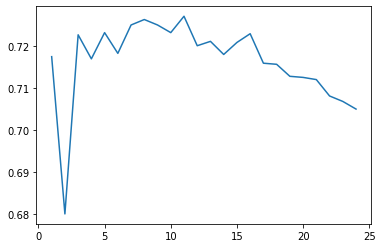

In [190]:
candidate_n_neighbors = np.arange(1,25)
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


results = {n: get_accuracy_knn(n, train_X_scaled, val_X_scaled, train_y, val_y) for n in candidate_n_neighbors}
best_n_neighbors = max(results, key=results.get)
print(best_n_neighbors)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [191]:
knn_model_2 = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn_model_2.fit(train_X_scaled, train_y)

KNeighborsClassifier(n_neighbors=11)

In [192]:
knn_model_2.score(val_X_scaled, val_y)

0.7269898885143894

In [193]:
y_pred = knn_model_2.predict(val_X_scaled)

<AxesSubplot:>

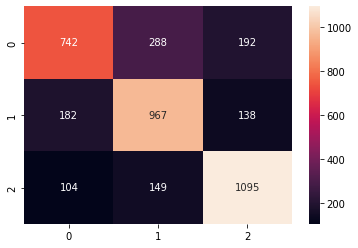

In [194]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# NAIVE BAYES

0.5136116152450091


<AxesSubplot:>

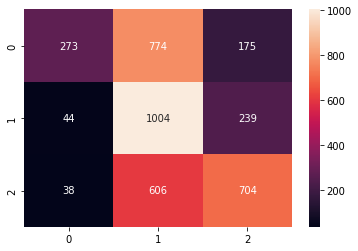

In [195]:
nb_model_1 = GaussianNB()

#Entreno el modelo
nb_model_1.fit(train_X, train_y)

#Realizo una predicción
y_pred = nb_model_1.predict(val_X)
print(nb_model_1.score(val_X, val_y))
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

0.5480943738656987


<AxesSubplot:>

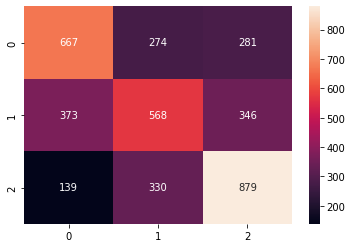

In [197]:
nb_model_2 = GaussianNB()
nb_model_2.fit(train_X_scaled, train_y)
print(nb_model_2.score(val_X_scaled, val_y))
y_pred = nb_model_2.predict(val_X_scaled)

confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# SVM

In [81]:
svm_model_1 = SVC(random_state=22)
svm_model_1.fit(train_X_scaled, train_y)

SVC(random_state=22)

In [82]:
y_pred = svm_model_1.predict(val_X_scaled)

In [83]:
svm_model_1.score(val_X_scaled, val_y)

0.6962435233160622

<AxesSubplot:>

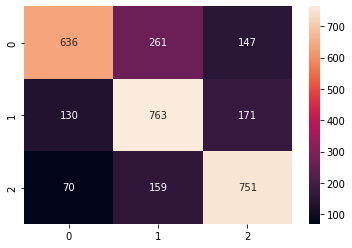

In [84]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [88]:
param_grid = {
                'C': [0.5, 1, 10, 100], # NOTE: values for C must be > 0
                'gamma': ['scale', 1, .1, .01, .001, .0001],
                'kernel': ['rbf'] # Some linear fittings last to 7/8 mins. Not recommended at all
            }
# svm_grid = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv=5, verbose = 2, n_jobs=4)
svm_grid = RandomizedSearchCV(estimator = SVC(), param_distributions = param_grid, cv=5, verbose = 2, n_jobs=4)

In [89]:
svm_grid.fit(train_X_scaled, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  39.6s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  40.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  40.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  40.8s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  38.9s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  41.2s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  41.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  41.3s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  41.8s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  40.8s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 1.0min
[CV] END ....................C=1, gamma=scale, k

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=4,
                   param_distributions={'C': [0.5, 1, 10, 100],
                                        'gamma': ['scale', 1, 0.1, 0.01, 0.001,
                                                  0.0001],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   verbose=2)

In [90]:
svm_grid.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 10}

In [198]:
svm_model_2 = SVC(C= 10, gamma= 1, random_state=22)
svm_model_2.fit(train_X_scaled, train_y)

SVC(C=10, gamma=1, random_state=22)

In [199]:
y_pred = svm_model_2.predict(val_X_scaled)

In [200]:
svm_model_2.score(val_X_scaled, val_y)

0.7186932849364791

<AxesSubplot:>

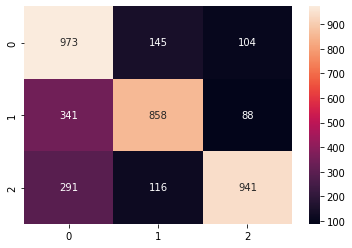

In [201]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')